In [49]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

In [50]:
data_old = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')


In [51]:
data_old.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [52]:
data_old = data_old.sample(frac=1) 

In [53]:
data_old.head(-10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
128220,adb4426c05b2d3a3,covers\nMaybe there should be a section that l...,0,0,0,0,0,0
14253,259fccb27ad999c9,The Heidi books are one of the best known work...,0,0,0,0,0,0
135114,d2bc51c92e2cddaa,It's Just \n\nIt's just a series of tubes. Ten...,0,0,0,0,0,0
157058,d7c201fc7f2dc785,", wow, good snag..",0,0,0,0,0,0
154824,b44f2b5aa7293f07,"""\n\n Edits proposed to plot description \n\n""...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
87506,ea158ab4466f57c6,could someone please put this in english,0,0,0,0,0,0
41334,6e3dc2708a914e10,the change of the pic,0,0,0,0,0,0
35703,5f6078498b4977ce,""":It's out now, but under the title """"The Sola...",0,0,0,0,0,0
116021,6c5817f620fb9582,)\n\n There is a scene in the last book of the...,0,0,0,0,0,0


In [54]:
len(data_old)

159571

In [55]:
# test_data # Many zeros

In [56]:
updated_data_toxic = data_old[data_old['toxic'] ==1]
data_v2 = data_old[~data_old['id'].isin(updated_data_toxic['id'])]
updated_data_obs = data_v2[data_v2['obscene'] ==1]
data_v3 = data_v2[~data_v2['id'].isin(updated_data_obs['id'])]
print(len(updated_data_toxic))
print(len(updated_data_obs))
len(data_v3)

15294
523


143754

In [57]:
updated_data_threat = data_v3[data_v3['threat'] ==1]
data_v4 = data_v3[~data_v3['id'].isin(updated_data_threat['id'])]
print(len(updated_data_threat))
len(data_v4)

25


143729

In [58]:
updated_data_insult = data_v4[data_v4['insult'] ==1]
data_v5 = data_v4[~data_v4['id'].isin(updated_data_insult['id'])]
print(len(updated_data_insult))
len(data_v5)

329


143400

In [59]:
updated_data_hate = data_v5[data_v5['identity_hate'] ==1]
data_v6 = data_v5[~data_v5['id'].isin(updated_data_hate['id'])]
print(len(updated_data_hate))
len(data_v6)

54


143346

# Getting all ones

In [60]:
all_ones = updated_data_toxic[(updated_data_toxic['identity_hate'] ==1) & (updated_data_toxic['insult'] ==1) & (updated_data_toxic['threat']  ==1) & (updated_data_toxic['toxic'] ==1) &(updated_data_toxic['obscene'] ==1) &(updated_data_toxic['severe_toxic'] ==1) ]
only_toxic = updated_data_toxic[~updated_data_toxic['id'].isin(all_ones['id'])]
print(len(all_ones))
len(only_toxic)

31


15263

In [61]:
len(updated_data_toxic)

15294

In [73]:
test_obs = updated_data_obs[:10]
test_data_v6 = data_v6[:15]
test_toxic = only_toxic[:15]
text_all = all_ones[:5]
test_threat = updated_data_threat[:2]
test_insult = updated_data_insult[:6]
test_hate = updated_data_hate[:3]

updated_data_obs = updated_data_obs[10:]
data_v6 = data_v6[15:]
only_toxic = only_toxic[15:]
all_ones = all_ones[5:]
updated_data_threat =  updated_data_threat[2:]
updated_data_insult = updated_data_insult[6:]
updated_data_hate = updated_data_hate[3:]

In [75]:
test_data = pd.concat([updated_data_obs[:10],data_v6[:15],only_toxic[:15],all_ones[:5],updated_data_threat[:2], updated_data_insult[:6],updated_data_hate[:3]],axis = 0)
len(test_data)

56

In [143]:
len(test_data)

56

In [76]:
# We need to select th samples from each of them
final_data = pd.concat([updated_data_obs, data_v6[:2000],only_toxic[:2000],all_ones,updated_data_threat,updated_data_insult,updated_data_hate], axis=0)
len(final_data)

4936

In [77]:
data_v6.head(2) # Every thing is zero

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
82287,dc27ea5b336cfb93,you quest. Lease member hat back,0,0,0,0,0,0
118867,7b528c53a699a9b7,RFA opened for Administrative Abuse \n\nNotified.,0,0,0,0,0,0


In [78]:
len(data_v6)

143331

In [79]:
len(data_old)

159571

In [80]:
final_data.head(-10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
107249,3d4fd5e93ac46305,"""""""Heather LaCunt"""" has also been trolling the...",0,0,1,0,0,0
42596,71b1f34bd9ec3cd2,"""\n\n Please do not vandalize pages, as you di...",0,0,1,0,0,0
59530,9f731e0873647e5d,Quoting Uncle Joey \n\nA: There's always a 'ch...,0,0,1,0,0,0
127977,ac82efdc88b2087f,BEING SO GOD DAMN SEXY,0,0,1,0,0,0
44821,77bef5e08832b255,"""\nProbably could strike the """"You sir are a c...",0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
81593,da39f7020d585398,"""IP 65.35.248.179 Dislikes Scienceman123 (ALOT...",0,0,0,0,0,1
51983,8b23f49bccb80772,http://www.thirdworldtraveler.com/Blum/Greece_...,0,0,0,0,0,1
82028,db70617d5edbc97e,"Stop editing it. I'm from Santa Clarita, I we...",0,0,0,0,0,1
88277,ec22b4c0ede9f78c,"""::::::::::""""During slavery and Jim Crow, race...",0,0,0,0,0,1


In [81]:
# updated_data_toxic.head()

In [82]:
final_data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000
mean,0.410454,0.042950,0.315438,0.022893,0.304498,0.055308
std,0.491966,0.202764,0.464737,0.149578,0.460241,0.228604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
data =final_data

In [86]:
len(test_data)

56

In [87]:
data.iloc[0]['comment_text']

'"""Heather LaCunt"" has also been trolling the LICD forums, apparently, but can\'t even get her dates right and lied her ass off about the process and meetings involved in Teletoon\'s theft of the show idea.\n\n"'

In [88]:
len(data)

4936

In [89]:
length_distribution = data['comment_text'].str.split().str.len()
length_distribution

107249     36
42596      27
59530      52
127977      5
44821      54
         ... 
40105      31
17279      32
33031      16
63949     283
154533     68
Name: comment_text, Length: 4936, dtype: int64

In [90]:
np.median(data['comment_text'].str.split().str.len()), np.mean(data['comment_text'].str.split().str.len())

(31.0, 64.8561588330632)

In [91]:
filtered_data = length_distribution[
    (length_distribution >= 0) & 
    (length_distribution <= 400)
]

In [92]:
len(filtered_data)

4833

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='comment_text', ylabel='Count'>

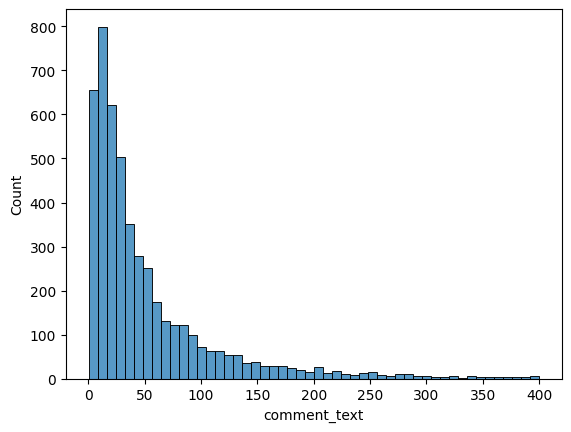

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.plot(1,2,1)
sns.histplot(data=filtered_data, bins=50) 


In [94]:
labels = []
text = []
for idx,rows in data.iterrows():
    # print(idx)
    # print(rows['comment_text'])
    text.append(rows['comment_text'])
    labels.append([rows['toxic'],rows['severe_toxic'],rows['obscene'],rows['threat'],rows['insult'],rows['identity_hate']])
    # break
print(len(text)),print(len(labels))

4936
4936


(None, None)

In [95]:
import random

In [96]:
i = random.randint(0,len(text))
print(f'i:{i}')
text[i],labels[i]

i:686


('First sentence is not general enough \n\nThe first sentence of the article (Opsins are a group of light-sensitive 35-55 kDa membrane-bound G protein-coupled receptors of the retinylidene protein family found in photoreceptor cells of the retina) refers to the animal rhodopsin not a general opsin protein.',
 [0, 0, 0, 0, 0, 0])

In [97]:
labels[:3]

[[0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0]]

In [98]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased",return_type = 'pt')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [99]:
class preparedata(Dataset):
    def __init__(self,text,labels,tokenizer,
                max_length):
        self.text = text
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_length
        
    def __len__(self):
        return len(self.text)
    def __getitem__(self,idx):
        
        text_token = self.tokenizer(self.text[idx], truncation = True, padding = 'max_length', max_length = self.max_len,return_tensors = 'pt')
        # texts.append(text_token)
        # labels.append(self.labels[idx])
        labels = torch.tensor(self.labels[idx], dtype=torch.float)
        # print(f'labels:{labels}')
        
        return {
    'input_ids': text_token['input_ids'],
    'attention_mask': text_token['attention_mask'],
    'label_ids': labels,
}


In [100]:
# example =  tokenizer(text[0], truncation = True, padding = 'max_length', max_length = 150,return_tensors = 'pt')
# print(example)

In [101]:
dataset = preparedata(text,
                     labels,
                     tokenizer,
                     max_length = 150)

In [102]:
dataloader = DataLoader(
    dataset = dataset,
    batch_size = 32,
    shuffle = True,num_workers = 0 
)

In [103]:
data_iter = iter(dataloader)
new_point = next(data_iter)

In [104]:
len(data_iter)

155

In [105]:
len(data_iter) * len(new_point)

465

In [106]:
# new_point

In [107]:
new_point['input_ids'].shape

torch.Size([32, 1, 150])

In [108]:
new_point['label_ids'].shape

torch.Size([32, 6])

# Building a model

In [109]:
from torch import nn

In [110]:
new_point['input_ids']

tensor([[[ 101, 3398, 2061,  ...,    0,    0,    0]],

        [[ 101, 2019, 3720,  ...,    0,    0,    0]],

        [[ 101, 1000, 2144,  ...,    0,    0,    0]],

        ...,

        [[ 101, 7592, 2017,  ...,    0,    0,    0]],

        [[ 101, 5181, 2005,  ...,    0,    0,    0]],

        [[ 101, 1000, 1008,  ..., 1012, 1996,  102]]])

In [111]:
max_index = torch.max(new_point['input_ids'])
print(max_index)

tensor(29519)


In [112]:
vocab_size = 30522

In [113]:
emb_layer = nn.Embedding(num_embeddings = vocab_size,
                                          embedding_dim = 16)

test1 = emb_layer(new_point['input_ids'])

In [114]:
test1.shape

torch.Size([32, 1, 150, 16])

In [115]:
class lstm_model(nn.Module):
    def __init__(self,
                vocab_size,
                output):
        super().__init__()
        self.Embedding_layer = nn.Embedding(num_embeddings =vocab_size ,
                                          embedding_dim = 32)
        self.linear_layer =   nn.Linear(32,64)
        self.relu = nn.ReLU()
        self.lstm1 = nn.LSTM(64,128,
                   bidirectional = True, batch_first = True)
        self.lstm2 = nn.LSTM(128*2,64,
                   bidirectional = True,batch_first = True)
        
        self.output = nn.Linear(64*2,output)

    def forward(self,x):
        x = x.squeeze(1)
        # print(f'going inside: {x.shape}')
        x = self.Embedding_layer(x)
        # print(f'coming outside:{x.shape}')
        
        x = self.linear_layer(x)
        x = self.relu(x)
        # print(f'x before:{x.shape}')
        x,_ = self.lstm1(x)
        x,_ = self.lstm2(x)
        # print(f'after {x.shape}')
        x = self.output(x)
        x = x.mean(dim=1)
        return x
        
    

In [116]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [117]:
model = lstm_model(vocab_size = vocab_size, output = 6).to(device)


In [118]:
tryp = new_point['input_ids'][0].to(device)
tryp=tryp.unsqueeze(1)
print(tryp.shape)

torch.Size([1, 1, 150])


In [119]:
sample = model(tryp)
sample.shape

torch.Size([1, 6])

In [120]:
sample

tensor([[-0.0106,  0.0926,  0.0461, -0.0843, -0.0756, -0.0339]],
       device='cuda:0', grad_fn=<MeanBackward1>)

In [121]:
input_tensor = torch.randint(0, vocab_size, (32, 150))
input_tensor.shape

torch.Size([32, 150])

In [122]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [123]:
loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.01)

In [124]:
import torchmetrics

In [125]:
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, batch_data in enumerate(dataloader):
        # Send data to target device

        X = batch_data['input_ids']
        y = batch_data['label_ids']
        X, y = X.to(device), y.to(device)

        model = model.to(device)
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        # y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        
        # train_acc += (y_pred_class == y).sum().item()/len(y_pred)
        # threshold = 0
        # print(f'yprd:{y_pred}')
        # preds = y_pred>0
        # train_acc += torchmetrics.Accuracy(multiclass=True)(preds, y.int()) 
    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    # train_acc = train_acc / len(dataloader)
    return train_loss

           

In [126]:
# train_step(model = model, dataloader = dataloader,loss_fn =loss, optimizer = optimizer, device = device)

In [127]:
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for 
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]} 
    For example if training for epochs=2: 
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]} 
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }
    
    # Make sure model on target device
    model.to(device)

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)

    # Return the filled results at the end of the epochs
    return results

In [128]:
results = train(model = model, train_dataloader = dataloader,loss_fn =loss, optimizer = optimizer, epochs = 100,device = device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4064 | 
Epoch: 2 | train_loss: 0.3660 | 
Epoch: 3 | train_loss: 0.3096 | 
Epoch: 4 | train_loss: 0.2646 | 
Epoch: 5 | train_loss: 0.2384 | 
Epoch: 6 | train_loss: 0.2294 | 
Epoch: 7 | train_loss: 0.2123 | 
Epoch: 8 | train_loss: 0.2070 | 
Epoch: 9 | train_loss: 0.2015 | 
Epoch: 10 | train_loss: 0.1927 | 
Epoch: 11 | train_loss: 0.1864 | 
Epoch: 12 | train_loss: 0.1814 | 
Epoch: 13 | train_loss: 0.1801 | 
Epoch: 14 | train_loss: 0.1690 | 
Epoch: 15 | train_loss: 0.1645 | 
Epoch: 16 | train_loss: 0.1598 | 
Epoch: 17 | train_loss: 0.1544 | 
Epoch: 18 | train_loss: 0.1513 | 
Epoch: 19 | train_loss: 0.1463 | 
Epoch: 20 | train_loss: 0.1387 | 
Epoch: 21 | train_loss: 0.1355 | 
Epoch: 22 | train_loss: 0.1334 | 
Epoch: 23 | train_loss: 0.1297 | 
Epoch: 24 | train_loss: 0.1181 | 
Epoch: 25 | train_loss: 0.1172 | 
Epoch: 26 | train_loss: 0.1136 | 
Epoch: 27 | train_loss: 0.1107 | 
Epoch: 28 | train_loss: 0.1150 | 
Epoch: 29 | train_loss: 0.1129 | 
Epoch: 30 | train_loss:

In [156]:
def test_cust(input_txt,model = model):
    in_tokenized = tokenizer(input_txt, truncation = True, padding = 'max_length', max_length = 150,return_tensors = 'pt')
    ids = in_tokenized['input_ids']
    # print(ids.shape)
    ids = ids.unsqueeze(0)
    # print(ids.shape)
    output_t = model(ids.to(device)).squeeze(0)
    pre = output_t>0
    final = [1 if item else 0 for item in pre]
    return final,output_t
    
    

In [130]:
text1 = 'you are a good man' 
text2 = 'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK' # 11010
text3 = "SuPeRTR0LL WiLL LiVe FoReVeR!\niF You DoN'T Re..." #1011
text4 ='I will kill you'

In [137]:
output,logits = test_cust(text3)

In [138]:
output

[0, 0, 0, 0, 1, 0]

In [140]:
# results

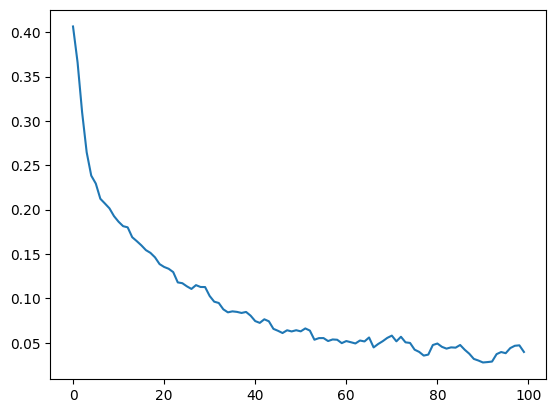

In [141]:
plt.plot(results['train_loss'])

In [144]:
len(test_data)

56

In [145]:
test_labels = []
test_text = []
for idx,rows in test_data.iterrows():
    # print(idx)
    # print(rows['comment_text'])
    test_text.append(rows['comment_text'])
    test_labels.append([rows['toxic'],rows['severe_toxic'],rows['obscene'],rows['threat'],rows['insult'],rows['identity_hate']])
    # break
print(len(test_text)),print(len(test_labels))

56
56


(None, None)

In [146]:
check = {'comment_text': test_text,
        'original_labels': test_labels}


In [147]:
check_df = pd.DataFrame(check)

In [148]:
check_df.head()

,comment_text,original_labels
0,"""""""Heather LaCunt"""" has also been trolling the...","[0, 0, 1, 0, 0, 0]"
1,"""\n\n Please do not vandalize pages, as you di...","[0, 0, 1, 0, 0, 0]"
2,Quoting Uncle Joey \n\nA: There's always a 'ch...,"[0, 0, 1, 0, 0, 0]"
3,BEING SO GOD DAMN SEXY,"[0, 0, 1, 0, 0, 0]"
4,"""\nProbably could strike the """"You sir are a c...","[0, 0, 1, 0, 0, 0]"


In [149]:
test_preds = []
for ids,rows in check_df.iterrows():
    output,_ = test_cust(rows['comment_text'])
    test_preds.append(output)
len(test_preds)

56

In [150]:
check_df['test_preds'] = test_preds

In [151]:
check_df.head(50)

,comment_text,original_labels,test_preds
0,"""""""Heather LaCunt"""" has also been trolling the...","[0, 0, 1, 0, 0, 0]","[0, 0, 1, 0, 0, 0]"
1,"""\n\n Please do not vandalize pages, as you di...","[0, 0, 1, 0, 0, 0]","[0, 0, 1, 0, 0, 0]"
2,Quoting Uncle Joey \n\nA: There's always a 'ch...,"[0, 0, 1, 0, 0, 0]","[0, 0, 1, 0, 0, 0]"
3,BEING SO GOD DAMN SEXY,"[0, 0, 1, 0, 0, 0]","[0, 0, 1, 0, 0, 0]"
4,"""\nProbably could strike the """"You sir are a c...","[0, 0, 1, 0, 0, 0]","[0, 0, 1, 0, 0, 0]"
5,"""\n\n """"removing thugstep. you've already had ...","[0, 0, 1, 0, 0, 0]","[0, 0, 1, 0, 0, 0]"
6,"Oh, bugger! I loved my 16+ sockies! I wish I h...","[0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0]"
7,"""\n\n Who is Dreadstar and How is it that they...","[0, 0, 1, 0, 0, 0]","[0, 0, 1, 0, 0, 0]"
8,Hey Dickhead \n\nPlease stop posting threats t...,"[0, 0, 1, 0, 1, 0]","[0, 0, 1, 0, 1, 0]"
9,"As I said, you're an asshole and that's all th...","[0, 0, 1, 0, 1, 0]","[1, 0, 1, 0, 0, 0]"


In [152]:
import torch
from sklearn.metrics import accuracy_score, hamming_loss, f1_score

def calculate_multilabel_metrics(y_true, y_pred, threshold=0.5):

    
    if not isinstance(y_true, torch.Tensor):
        y_true = torch.tensor(y_true)
    if not isinstance(y_pred, torch.Tensor):
        y_pred = torch.tensor(y_pred)
    
    # Convert predictions to binary using threshold
    y_pred_binary = (y_pred >= threshold).float()
    
   
    y_true_np = y_true.numpy()
    y_pred_np = y_pred_binary.numpy()
    
    exact_match = (y_true == y_pred_binary).all(dim=1).float().mean().item()
    
    
    per_label_accuracy = (y_true == y_pred_binary).float().mean(dim=0)
    
    # Calculate hamming accuracy (proportion of correct predictions)
    hamming_acc = 1 - hamming_loss(y_true_np, y_pred_np)
    
    # Calculate F1 score
    f1_micro = f1_score(y_true_np, y_pred_np, average='micro')
    f1_macro = f1_score(y_true_np, y_pred_np, average='macro')
    
    return {
        'exact_match_accuracy': exact_match,
        'per_label_accuracy': per_label_accuracy.tolist(),
        'hamming_accuracy': hamming_acc,
        'f1_micro': f1_micro,
        'f1_macro': f1_macro
    }



In [153]:
metrics = calculate_multilabel_metrics(test_labels, test_preds)

In [154]:
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value}")

exact_match_accuracy: 0.8392857313156128
per_label_accuracy: [0.9285714030265808, 0.9821428656578064, 0.9642857313156128, 1.0, 0.9285714030265808, 0.9821428656578064]
hamming_accuracy: 0.9642857142857143
f1_micro: 0.9333333333333333
f1_macro: 0.9416305916305917


In [155]:
torch.save(model,'/kaggle/working/lstm_model.pth')

In [160]:
model_test = torch.load('/kaggle/working/lstm_model.pth',weights_only = False)
output,logits = test_cust('you suck it big time \n\nyou suck it big time',model_test)

In [161]:
output

[1, 0, 1, 0, 1, 0]